In [1]:
from pathlib import Path
from evaluate_sentiment import Evaluator
import pandas as pd
from classifiers import *
import utils
import morphamizer as morph
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from sklearn.model_selection import KFold, train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics
from imblearn.combine import SMOTETomek
from sklearn.feature_selection import SelectKBest, SelectFromModel, RFE
from sklearn.feature_selection import chi2
from train import *
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

from train import train_all_models, get_best_model, train_all_models_with_cv, train_all_models_with_cv_balance
from morphamizer import create_morphamaized_file
from utils import get_strongest_words
import utils
import morphamizer as morph
import sys

In [2]:
TEST_PATH = r'data\test_tweet_data_labeld_final_morph_yap.tsv'

TRAIN_PATH = r'data\train_tweet_data_labeld_final_morph_yap.tsv'

all_path = r'data\all_tweet_data_labeld_final_morph_yap.tsv'
train_path = TRAIN_PATH
test_path = TEST_PATH
cv=True
to_morph=False
print_info=True
with_stat=True
save_model_f=True

2.0    368
0.0    163
1.0     76
Name: label, dtype: int64
2.0    0.606260
0.0    0.268534
1.0    0.125206
Name: label, dtype: float64


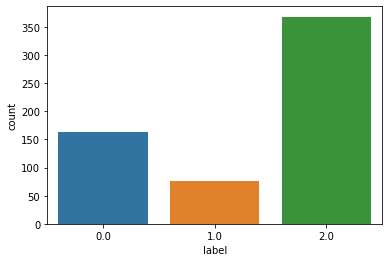

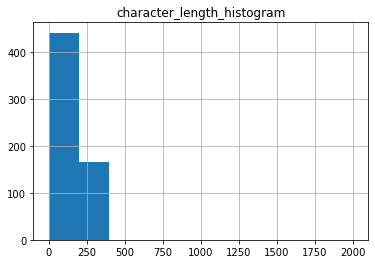

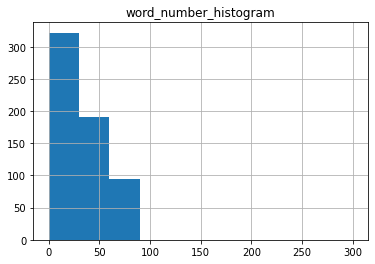

['של', 'את', 'זה', 'אני']


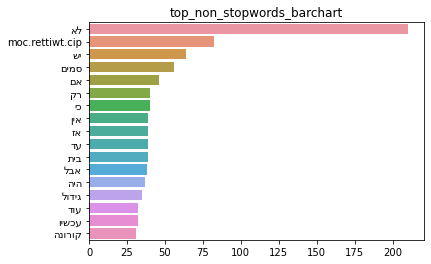

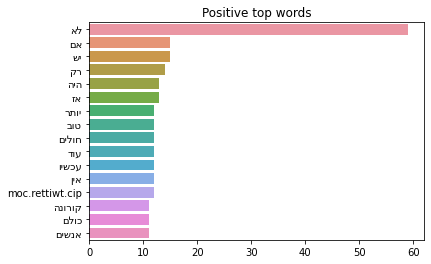

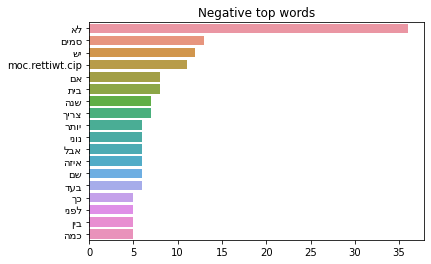

2.0    460
0.0    204
1.0     96
Name: label, dtype: int64
2.0    0.605263
0.0    0.268421
1.0    0.126316
Name: label, dtype: float64


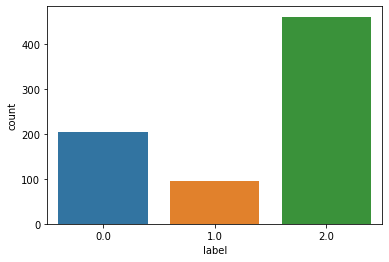

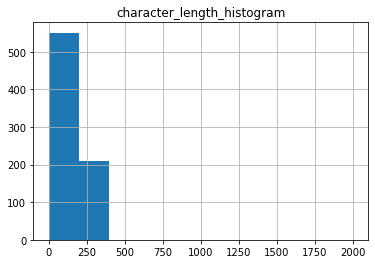

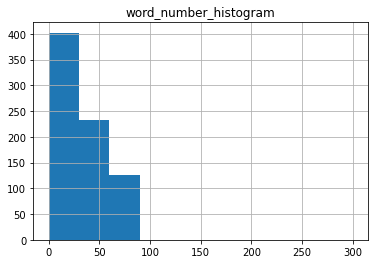

['של', 'את', 'זה', 'אני']


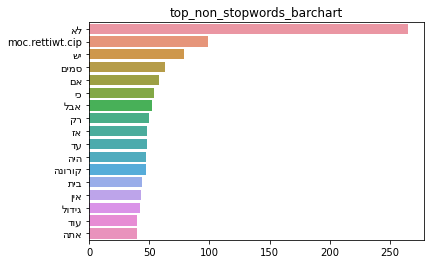

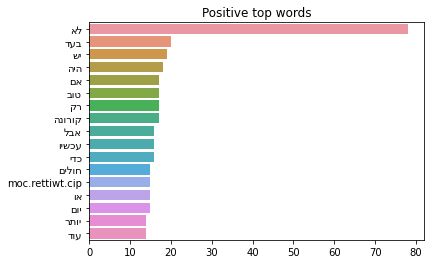

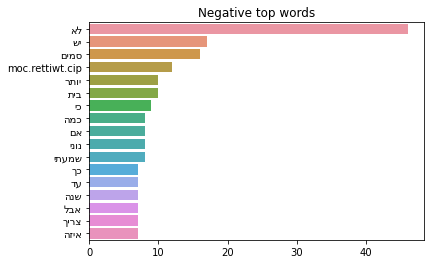

The Majority Classifier's results are: 
Micro precision:0.2679738562091503, recall:0.2679738562091503, f1:0.2679738562091503
Macro precision:0.08932461873638343, recall:0.3333333333333333, f1:0.140893470790378
[[41  0  0]
 [20  0  0]
 [92  0  0]]
Accuracy: 0.2679738562091503


The Throw a die Classifier's results are: 
Micro precision:0.21568627450980393, recall:0.21568627450980393, f1:0.21568627450980393
Macro precision:0.14044429176686135, recall:0.3536585365853659, f1:0.1979213198725394
[[23 18  0]
 [10 10  0]
 [49 43  0]]
Accuracy: 0.21568627450980393


original tr ds countCounter({2.0: 460, 0.0: 204, 1.0: 96})
new tr ds countCounter({0.0: 460, 1.0: 460, 2.0: 460})
TheDecisionTreeRegressor(1, 1)'s results are: 
Micro precision:0.591304347826087, recall:0.591304347826087, f1:0.591304347826087
Macro precision:0.6064380064380064, recall:0.5885478158205432, f1:0.5804014599732709
[[78 11 23]
 [51 42 19]
 [25 12 84]]
Accuracy: 0.591304347826087


C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


mean Cross validation : -0.033609013037886735


TheMultinomialNB(1, 1)'s results are: 
Micro precision:0.5942028985507246, recall:0.5942028985507246, f1:0.5942028985507246
Macro precision:0.6020494836128473, recall:0.592409484454939, f1:0.5872407711488171
[[78 12 22]
 [48 47 17]
 [23 18 80]]
Accuracy: 0.5942028985507246
mean Cross validation : 0.5934782608695652


TheLogisticRegression(1, 1)'s results are: 
Micro precision:0.6463768115942029, recall:0.6463768115942029, f1:0.6463768115942029
Macro precision:0.6439380585335107, recall:0.6448740653286108, f1:0.6431086018885722
[[60 29 23]
 [20 78 14]
 [19 17 85]]
Accuracy: 0.6463768115942029
mean Cross validation : 0.6434782608695652


TheRandomForestClassifier(1, 1)'s results are: 
Micro precision:0.6927536231884058, recall:0.6927536231884058, f1:0.6927536231884058
Macro precision:0.6910224183365706, recall:0.6911648957103503, f1:0.6876865972726539
[[61 31 20]
 [14 87 11]
 [17 13 91]]
Accuracy: 0.6927536231884058
mean Cross validation : 

In [3]:
measurement = utils.CROSS_VALIDATION
all_path = r'data\all_tweet_data_labeld_final_morph_yap.tsv'

# models_dict, count_vect, evaluator = train_all_models_with_cv(train_path, test_path, all_path, to_morph,
#                                                               print_info,with_stat)
models_dict, evaluator = train_all_models_with_cv_balance(train_path, test_path, all_path, to_morph,
                                                          print_info, with_stat)
best_model, name, pred, score = get_best_model(models_dict, None, measurement)

In [57]:
models_dict

{'DecisionTreeRegressor': {'classifier': DecisionTreeRegressor(max_features='auto'),
  'macro': {'precision': 0.4634719285882077,
   'recall': 0.46219512195121953,
   'f1': 0.45845162362642516},
  'micro': {'precision': 0.6078431372549019,
   'recall': 0.6078431372549019,
   'f1': 0.6078431372549019},
  'accuracy': 0.6078431372549019,
  'confusion_matrix': array([[22,  1, 18],
         [ 6,  2, 12],
         [15,  8, 69]], dtype=int64),
  'prediction': array([2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0,
         0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2,
         2, 0, 2, 2, 0, 2, 0, 1, 2, 2, 1, 0, 2, 0, 0, 2, 2, 1, 2, 2, 2, 0,
         2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
         2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0,
         1, 0, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 0, 0, 2],
        dtype=int64),


In [17]:
# pred.shape
# best_model[utils.CLF]
best_model,name

({'classifier': RandomForestClassifier(n_estimators=1376),
  'macro': {'precision': 0.7160322490964693,
   'recall': 0.7139627978745446,
   'f1': 0.7138014332591626},
  'micro': {'precision': 0.7122093023255814,
   'recall': 0.7122093023255814,
   'f1': 0.7122093023255816},
  'accuracy': 0.7122093023255814,
  'confusion_matrix': array([[79, 21, 13],
         [28, 82, 12],
         [18,  7, 84]], dtype=int64),
  'prediction': array([2, 2, 2, 2, 1, 0, 2, 0, 1, 2, 2, 1, 0, 2, 0, 1, 2, 0, 1, 0, 0, 0,
         1, 1, 0, 1, 2, 0, 0, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0, 2, 0, 0, 2, 0,
         0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 1, 1, 2, 2, 0, 2, 2,
         2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 0, 0, 1, 2, 1, 2,
         0, 1, 0, 0, 2, 2, 2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 0, 0, 1, 0, 2, 0,
         1, 0, 2, 1, 0, 1, 0, 2, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 2, 0, 2, 0,
         1, 0, 0, 2, 1, 2, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 2, 0, 1,
         2, 1, 2, 1, 1, 0, 1, 1, 1, 0, 2, 0, 0, 

2.0    368
0.0    163
1.0     76
Name: label, dtype: int64
2.0    0.606260
0.0    0.268534
1.0    0.125206
Name: label, dtype: float64


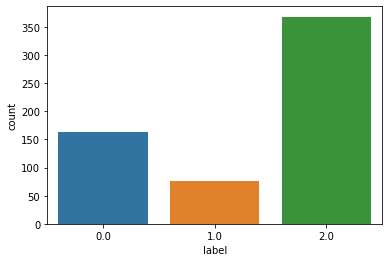

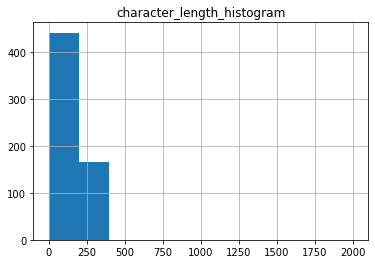

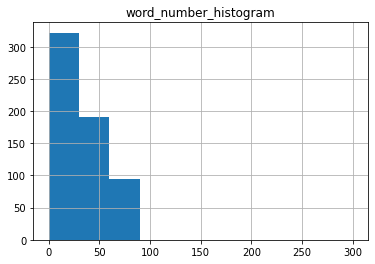

['של', 'את', 'זה', 'אני']


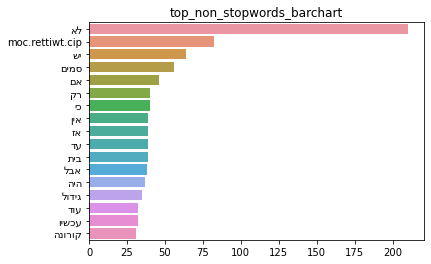

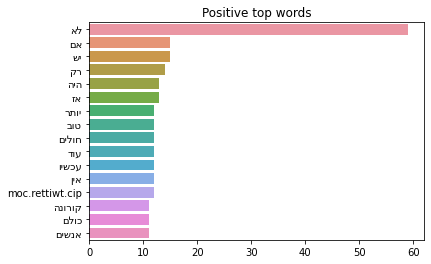

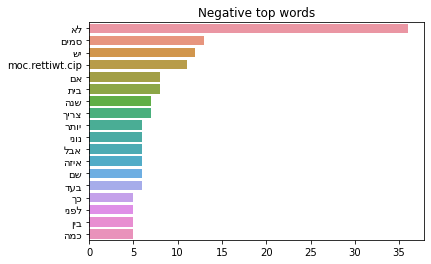

2.0    460
0.0    204
1.0     96
Name: label, dtype: int64
2.0    0.605263
0.0    0.268421
1.0    0.126316
Name: label, dtype: float64


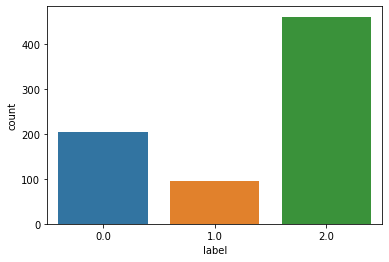

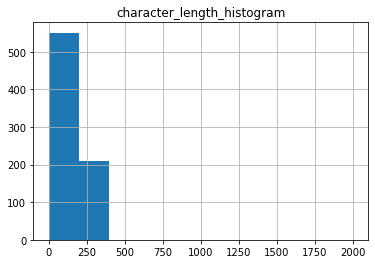

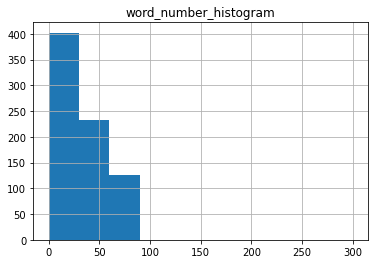

['של', 'את', 'זה', 'אני']


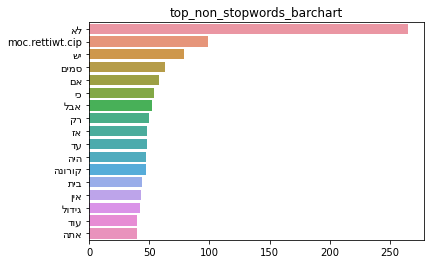

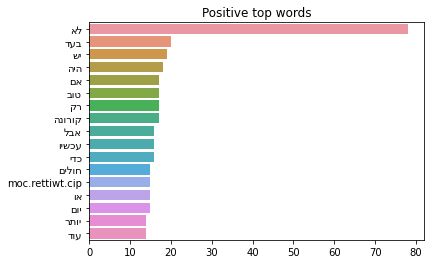

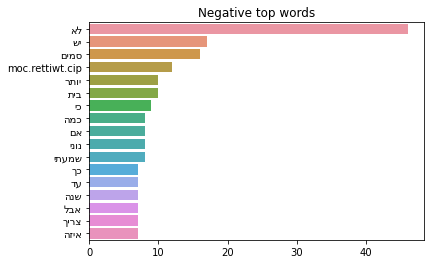

The Majority Classifier's results are: 
Micro precision:0.2679738562091503, recall:0.2679738562091503, f1:0.2679738562091503
Macro precision:0.08932461873638343, recall:0.3333333333333333, f1:0.140893470790378
[[41  0  0]
 [20  0  0]
 [92  0  0]]
Accuracy: 0.2679738562091503


The Throw a die Classifier's results are: 
Micro precision:0.2222222222222222, recall:0.2222222222222222, f1:0.2222222222222222
Macro precision:0.14717948717948717, recall:0.37032520325203255, f1:0.20604452307238685
[[23 18  0]
 [ 9 11  0]
 [46 46  0]]
Accuracy: 0.2222222222222222


DecisionTreeRegressor
TheDecisionTreeRegressor's results are: 
Micro precision:0.6078431372549019, recall:0.6078431372549019, f1:0.6078431372549019
Macro precision:0.4634719285882077, recall:0.46219512195121953, f1:0.45845162362642516
[[22  1 18]
 [ 6  2 12]
 [15  8 69]]
Accuracy: 0.6078431372549019


C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


mean Cross validation : 0.5934210526315788


MultinomialNB
TheMultinomialNB's results are: 
Micro precision:0.6143790849673203, recall:0.6143790849673203, f1:0.6143790849673203
Macro precision:0.5364238410596026, recall:0.34959349593495936, f1:0.2834083006348295
[[ 2  0 39]
 [ 0  0 20]
 [ 0  0 92]]
Accuracy: 0.6143790849673203
mean Cross validation : 0.6144736842105263


LogisticRegression
TheLogisticRegression's results are: 

C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Micro precision:0.673202614379085, recall:0.673202614379085, f1:0.673202614379085
Macro precision:0.4603174603174603, recall:0.4407917992223401, f1:0.42319508448540705
[[15  0 26]
 [ 2  0 18]
 [ 4  0 88]]
Accuracy: 0.673202614379085


C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


mean Cross validation : 0.6473684210526316


RandomForestClassifier
TheRandomForestClassifier's results are: 
Micro precision:0.6928104575163399, recall:0.6928104575163399, f1:0.6928104575163399
Macro precision:0.842891901286062, recall:0.4642276422764227, f1:0.4738917559878258
[[12  0 29]
 [ 2  2 16]
 [ 0  0 92]]
Accuracy: 0.6928104575163399
mean Cross validation : 0.6381578947368421


SVC
TheSVC's results are: 
Micro precision:0.6862745098039216, recall:0.6862745098039216, f1:0.6862745098039216
Macro precision:0.46888734674994215, recall:0.45254506892895013, f1:0.43538092865447126
[[16  0 25]
 [ 3  0 17]
 [ 3  0 89]]
Accuracy: 0.6862745098039216


C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


mean Cross validation : 0.6631578947368422


LogisticRegressionNone
TheLogisticRegressionNone's results are: 
Micro precision:0.6078431372549019, recall:0.6078431372549019, f1:0.6078431372549019
Macro precision:0.4820176902536715, recall:0.4567338282078473, f1:0.463323871573824
[[15  2 24]
 [ 7  4  9]
 [10  8 74]]
Accuracy: 0.6078431372549019
mean Cross validation : 0.6236842105263158


TheDecisionTreeRegressor(1, 2)'s results are: 
Micro precision:0.6143790849673203, recall:0.6143790849673203, f1:0.6143790849673203
Macro precision:0.45750148544266195, recall:0.4522976316719689, f1:0.4502484600404269
[[19  5 17]
 [ 6  2 12]
 [15  4 73]]
Accuracy: 0.6143790849673203
mean Cross validation : 0.6065789473684211


TheMultinomialNB(1, 2)'s results are: 
Micro precision:0.6078431372549019, recall:0.6078431372549019, f1:0.6078431372549019
Macro precision:0.5350877192982456, recall:0.34146341463414637, f1:0.2672391360915951
[[ 1  0 40]
 [ 0  0 20]
 [ 0  0 92]]
Accuracy: 0.6078431372549019
mean 

C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TheLogisticRegression(1, 2)'s results are: 
Micro precision:0.673202614379085, recall:0.673202614379085, f1:0.673202614379085
Macro precision:0.49264705882352944, recall:0.43628490632732414, f1:0.42115345835854007
[[14  0 27]
 [ 0  0 20]
 [ 3  0 89]]
Accuracy: 0.673202614379085


C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


mean Cross validation : 0.6473684210526316


TheRandomForestClassifier(1, 2)'s results are: 
Micro precision:0.673202614379085, recall:0.673202614379085, f1:0.673202614379085
Macro precision:0.8555555555555555, recall:0.435807705903146, f1:0.43160506449380875
[[11  0 30]
 [ 0  1 19]
 [ 1  0 91]]
Accuracy: 0.673202614379085
mean Cross validation : 0.6513157894736843


TheSVC(1, 2)'s results are: 
Micro precision:0.6993464052287581, recall:0.6993464052287581, f1:0.6993464052287581
Macro precision:0.8088768115942028, recall:0.4903852951572994, f1:0.5043560606060606
[[17  0 24]
 [ 2  2 16]
 [ 4  0 88]]
Accuracy: 0.6993464052287581
mean Cross validation : 0.6631578947368422


TheLogisticRegressionNone(1, 2)'s results are: 
Micro precision:0.6078431372549019, recall:0.6078431372549019, f1:0.6078431372549019
Macro precision:0.47189638318670574, recall:0.44369034994697776, f1:0.4489136413641364
[[15  2 24]
 [ 6  3 11]
 [10  7 75]]
Accuracy: 0.6078431372549019
mean Cross validation : 0.62368421

C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


TheLogisticRegression(1, 3)'s results are: 
Micro precision:0.6601307189542484, recall:0.6601307189542484, f1:0.6601307189542484
Macro precision:0.4705882352941176, recall:0.4245316366207141, f1:0.40673522887678965
[[13  0 28]
 [ 0  0 20]
 [ 4  0 88]]
Accuracy: 0.6601307189542484


C:\Users\jonny\Anaconda3\envs\hebnlp\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


mean Cross validation : 0.6473684210526316


TheRandomForestClassifier(1, 3)'s results are: 
Micro precision:0.6601307189542484, recall:0.6601307189542484, f1:0.6601307189542484
Macro precision:0.8253968253968255, recall:0.4240544361965359, f1:0.4161528849232168
[[10  0 31]
 [ 0  1 19]
 [ 2  0 90]]
Accuracy: 0.6601307189542484
mean Cross validation : 0.6407894736842105


TheSVC(1, 3)'s results are: 
Micro precision:0.7058823529411765, recall:0.7058823529411765, f1:0.7058823529411765
Macro precision:0.8143044619422573, recall:0.49851537645811245, f1:0.5131057679002885
[[18  0 23]
 [ 2  2 16]
 [ 4  0 88]]
Accuracy: 0.7058823529411765
mean Cross validation : 0.6631578947368422


TheLogisticRegressionNone(1, 3)'s results are: 
Micro precision:0.6405228758169934, recall:0.6405228758169934, f1:0.6405228758169934
Macro precision:0.5228650137741047, recall:0.4527925061859314, f1:0.46088382144720175
[[13  2 26]
 [ 4  3 13]
 [ 5  5 82]]
Accuracy: 0.6405228758169934
mean Cross validation : 0.6236

In [26]:
 models_dict, count_vect, evaluator = train_all_models_with_cv(train_path, test_path, all_path, to_morph,
                                                                      print_info,with_stat)

In [34]:
best_model_nob, name, pred_nob, pred_nob = get_best_model(models_dict, None, measurement)
name

'SVC'

In [33]:
best_model_nob,name

({'classifier': SVC(kernel='linear'),
  'macro': {'precision': 0.46888734674994215,
   'recall': 0.45254506892895013,
   'f1': 0.43538092865447126},
  'micro': {'precision': 0.6862745098039216,
   'recall': 0.6862745098039216,
   'f1': 0.6862745098039216},
  'accuracy': 0.6862745098039216,
  'confusion_matrix': array([[16,  0, 25],
         [ 3,  0, 17],
         [ 3,  0, 89]], dtype=int64),
  'prediction': array([2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0,
         2, 2, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2,
         2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2],
        dtype=int64),
  'cross_val': 0.6631578947368422},
 'SVC')

In [54]:
ngram=(1,3)

In [46]:
train_df, test_df = data_acquisition(train_path, test_path, False, False, False)
test_df.text

0      מחפש תורמים ל ה עניים אומנים כמו אפריים שמיר ....
1      היום ה , יום ה קנאביס , אז אני מצפה מ נתניהו ל...
2      מטופלי קנאביס ב ה מחלה סופנית ו עוד תעוקות נפש...
3                 ה ליכוד כבר עשה לגליזציה ל סמים קלים ?
4      קאנומד נחתם מ.כוונות מחייב ל ייצור מוצרי קנאבי...
                             ...                        
148    משטרת ישראל תפסה ל מעלה מ , ש תילי קנאביס , ש ...
149                                     קנאביס זה סעיף ?
150    בעל מועדון מוכר מ נהריה , נעצר לאחר ש נמצא קונ...
151    הצעה מעניינת שנת פיילוט לגליזציה ב אילת , ו אז...
152                      נעצרו חשודים ב הברחת ק ג קנאביס
Name: text, Length: 153, dtype: object

In [55]:
X_train_tf, X_test_tfidf=ngram_text_tf_idf(train_df.text,test_df.text,ngram)

In [37]:
# train_df, test_df = data_acquisition(train_path, test_path, False, False, False)
# X_train_counts, X_test_counts, X_train_tf, X_test_tfidf, count_vect = data_pre_processing(train_df.text,test_df.text)

In [56]:
pred=best_model[utils.CLF].predict(X_test_tfidf)


ValueError: Number of features of the model must match the input. Model n_features is 5709 and input n_features is 28407 

In [53]:
evaluator.set_label(test_df.label)
pred=best_model_nob[utils.CLF].predict(X_test_tfidf)
evaluator.show_errors(pred, name)
evaluator.show_correct(pred, name)

####ERRORS ANALYSIS  for SVC#########
overall, there are 48 instances with wrong sentiment
מחפש תורמים ל ה עניים אומנים כמו אפריים שמיר ..... הוא נאלץ להסיט על מנת ש יעזרו ל הוא אהוד ברק תקום לא כמה עצי קנביס או סדר ל הוא איזה לוליטה, true:0.0, predicted:2.0

היום ה , יום ה קנאביס , אז אני מצפה מ נתניהו לקיים את הבטחתו ל מגזין קנאביס ו לעשות לגליזציה עכשיו כפי ש הבטיח ל הם . מה , לא ?, true:0.0, predicted:2.0

מטופלי קנאביס ב ה מחלה סופנית ו עוד תעוקות נפש תמשיכו לשלם פרוטקשן או תמותו ..., true:0.0, predicted:2.0

קאנומד נחתם מ.כוונות מחייב ל ייצור מוצרי קנאביס רפואי ל ה גרמניה ב היקף של מ אירו CNMD, true:0.0, predicted:2.0

קבלת קנאביס רפואי תעבור מ רישיון ל ה מרשם של רופא מומחה, true:0.0, predicted:2.0

אגב סיפרתי ל אתם על תחביב עציצי ה תבלין של אני ? כבר יש ל אני שבעה כ ה אלה ב מרפסת אורגנו , ב זילקום , נענע , לואיזה , טימין , למון גראס ו בצל ירוק ו אני מוסיפה מהם ל כל סלט ו תבשיל . אבא ו אמא אפילו קנו ל אני שתיל עגבניות שרי ש בקרוב יצטרף ל מרפסת !!! אגב זה תחביב ממש זול ב ה עציצים 

In [4]:
print(f'best model : {name}, measurement : {measurement} , score= {score} ')
best_model.predict()
evaluator.show_errors(pred, name)

best model : RandomForestClassifier(1, 3), measurement : cross_val , score= 0.7078282026869778 
####ERRORS ANALYSIS  for RandomForestClassifier(1, 3)#########


ValueError: Must have equal len keys and value when setting with an iterable

In [58]:
models_dict

{'DecisionTreeRegressor': {'classifier': DecisionTreeRegressor(max_features='auto'),
  'macro': {'precision': 0.4634719285882077,
   'recall': 0.46219512195121953,
   'f1': 0.45845162362642516},
  'micro': {'precision': 0.6078431372549019,
   'recall': 0.6078431372549019,
   'f1': 0.6078431372549019},
  'accuracy': 0.6078431372549019,
  'confusion_matrix': array([[22,  1, 18],
         [ 6,  2, 12],
         [15,  8, 69]], dtype=int64),
  'prediction': array([2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0,
         0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 2, 2, 2,
         2, 0, 2, 2, 0, 2, 0, 1, 2, 2, 1, 0, 2, 0, 0, 2, 2, 1, 2, 2, 2, 0,
         2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
         2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
         0, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0,
         1, 0, 2, 2, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 0, 0, 2],
        dtype=int64),
